In [1]:
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
X = pd.read_csv('./mapped_match_hero_item.csv')
X.head()

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_vanguard,dire_veil_of_discord,dire_vitality_booster,dire_vladmir,dire_void_stone,dire_ward_dispenser,dire_ward_observer,dire_ward_sentry,dire_wraith_band,dire_yasha
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [3]:
matches = pd.read_csv('./match.csv')
y = matches['radiant_win'].apply(lambda win: 1 if win else 0)
classes = ['Dire Win', 'Radiant Win']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

35000 15000


In [5]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
models = [LinearRegression(),
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'),
          KNeighborsRegressor(n_neighbors=6),SVR(kernel='linear'),
          LogisticRegression(n_jobs=-1, random_state=7)]

In [8]:
%%time
LogR_model = LogisticRegression(n_jobs=-1, random_state=7)
LogR_model.fit(X_train, y_train)

CPU times: user 3.96 s, sys: 316 ms, total: 4.28 s
Wall time: 15.6 s


In [9]:
round(LogR_model.score(X_train, y_train), 3), round(LogR_model.score(X_test, y_test), 3)

(0.971, 0.966)

In [10]:
y_pred = LogR_model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogR_model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6957  276]
 [ 233 7534]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7233
           1       0.96      0.97      0.97      7767

   micro avg       0.97      0.97      0.97     15000
   macro avg       0.97      0.97      0.97     15000
weighted avg       0.97      0.97      0.97     15000



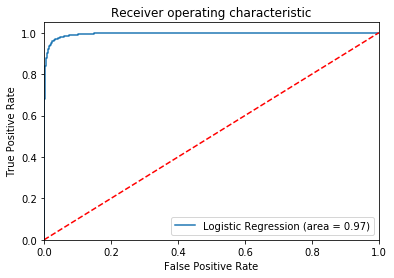

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
LogR_model_roc_auc = roc_auc_score(y_test, LogR_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogR_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % LogR_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [29]:
%%time
RFreg_model = RandomForestRegressor(n_estimators=100, 
                                    oob_score=True, 
                                    random_state=1)
RFreg_model.fit(X_train, y_train)

CPU times: user 9min 49s, sys: 1.2 s, total: 9min 51s
Wall time: 9min 55s


In [30]:
y_pred = RFreg_model.predict(X_test)
print("AUC-ROC (oob) = ", roc_auc_score(y_train, RFreg_model.oob_prediction_))
print("AUC-ROC (test) = ", roc_auc_score(y_test, y_pred))

AUC-ROC (oob) =  0.9621386457789174
AUC-ROC (test) =  0.9638397986739141


In [34]:
from sklearn.metrics import mean_squared_error
model_score = RFreg_model.score(X_train,y_train)
print('coefficient of determination R^2 of the prediction.: ',model_score)
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))

coefficient of determination R^2 of the prediction.:  0.9565896359362338
Mean squared error: 0.08
Test Variance score: 0.69


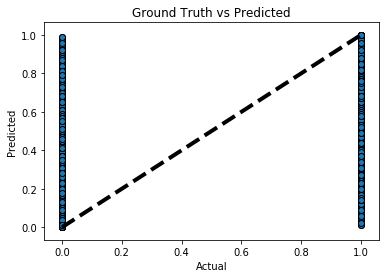

In [36]:
from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

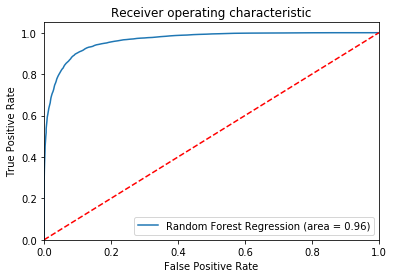

In [39]:
RFreg_model_roc_auc = roc_auc_score(y_test, RFreg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RFreg_model.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Regression (area = %0.2f)' % RFreg_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFreg_ROC')
plt.show()